<a href="https://colab.research.google.com/github/DenisseUrenda/MachineLearning/blob/main/L08_Pipelines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pipelines

https://scikit-learn.org/stable/modules/compose.html

Los transformadores son usualmente combinados con clasificadores, regresores u otros estimadores para crear un estimador compuesto. La herramienta más común es un Pipeline.

Un Popeline puede ser usado para encadenar multiples estimadores en uno solo. Esto es útil si hay una secuencia finita de pasos en el procesamiento de datos.

El Pipeline es construido usando lista de pares del tipo `(key, value)`, donde `key` es una cadena de caracteres que contiene el nombre que le quieres dar a ese paso y `value` es un objeto de tipo estimador.

## Regresión en datos ficticios con Least Square Regression

1. Escalamiento de las caracteristicas usando `StandardScaler`.
2. Entrenamiento de una modelado de Regresión lineal.

In [ ]:
import numpy as np
import pandas as pd

# Generando datos
n, sx1, sx2, rho = 200, 15, 20, 0.7
X = np.random.multivariate_normal(
    mean=[100, 250],
    cov=[[sx1**2, sx1*sx2*rho],
         [sx1*sx2*rho, sx1**2]],
    size=n
)
y = 1000 + 5*X[:,0] - 2*X[:,1] + np.random.normal(loc=0, scale=25, size=n)

In [ ]:
from sklearn.model_selection import train_test_split

# Separando en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Definición del Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

En el pipeline anterior primero se ejecutará una transformación `StandardScaler()` y al resultado de éste se le aplicará el modelo de regresión lineal simple `LinearRegression()`.

In [ ]:
# Entrenamiento
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

Podemos acceder a los estimadores de un pipeline usandolo el atributo`.steps` o indexando por nombre o índice.

In [ ]:
pipeline.steps

[('scaler', StandardScaler()), ('regressor', LinearRegression())]

In [ ]:
pipeline[1]

LinearRegression()

In [ ]:
pipeline['regressor']

LinearRegression()

Podemos acceder a los atributos de un estimador de forma habitual

In [ ]:
b0 = pipeline['regressor'].intercept_
b1, b2 = pipeline['regressor'].coef_
print(
  f'Ecuacion de regresión lineal:\n\
  y = {b0} + {b1}x1 + {b2}x2'
)

Ecuacion de regresión lineal:
  y = 1000.3740003137882 + 75.39769619825961x1 + -27.367267754677016x2


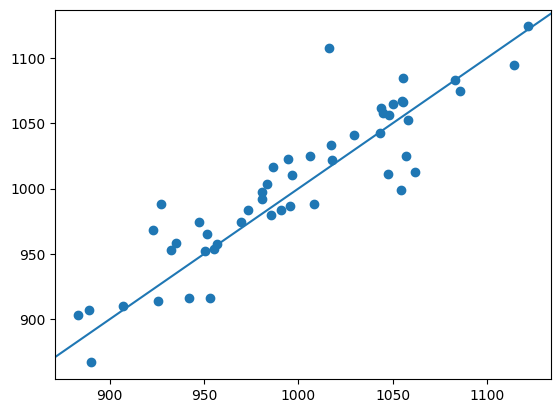

In [ ]:
import matplotlib.pyplot as plt

# Predicción
y_pred = pipeline.predict(X_test)
plt.scatter(y_test, y_pred)
plt.axline((1000,1000), slope=1)
plt.show()

In [ ]:
print(pipeline.score(X_train, y_train))
print(pipeline.score(X_test, y_test))

0.805205875327432
0.8022152193397482


## Clasificación de vinos con support vector machine (SVM)

https://scikit-learn.org/stable/modules/svm.html

Support vector machines (SVMs) son un conjunto de métodos de aprendizaje supervisado para clasificación, regresión y detección de datos atípicos.

`SVC`, `NuSVC` y `LinearSVC` son clases capaces de realizar clasificación binaria y multiclase en un conjunto de datos.

SVM constuye un hiperplano o conjunto de hiperplanos en una espacio dimensional grande o infinito. Intuitivamente, una buena separación es alcanzada por el hiperplano que tiene la mayor distancia al punto del conjunto de entremaniento más cercano de cada clase.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_separating_hyperplane_001.png)

`SVC` y `NuSVC` son métodos similares, pero aceptan un conjunto de parámetros ligeramente distintos y tienen una formulación matemática distinta. `LinearSVC` es otra implementacion de SVC para el caso de un kernel lineal.


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data=data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [ ]:
print(X.head(n=10))
print(y.sample(n=10))

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   
6    14.39        1.87  2.45               14.6       96.0           2.50   
7    14.06        2.15  2.61               17.6      121.0           2.60   
8    14.83        1.64  2.17               14.0       97.0           2.80   
9    13.86        1.35  2.27               16.0       98.0           2.98   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)

In [ ]:
# Creación del pipeline (pasos)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

Este pipeline hará los siguientes pasos
1. Escalará los datos
2. Aplicará SVC

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [ ]:
y_pred = pipe.predict(X_test)
y_pred

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 2,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0,
       0, 2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 2, 0, 0, 1, 1, 0, 2,
       1, 1, 1, 0, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1,
       1, 1, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 2, 1, 1, 1, 2,
       2, 1])

In [ ]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
accuracy_score(y_test, y_pred)

0.9626865671641791

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[44,  1,  0],
       [ 0, 51,  4],
       [ 0,  0, 34]])

## Clasificación de mensajes (spam/no spam)

In [ ]:
path = 'https://gist.githubusercontent.com/javierIA/dee51cb04824e519cb113b49897b84bb/raw/f78307e58718bebaafe566ad725b17a6298c803a/spam.csv'
df = pd.read_csv(path)
df.head(n=10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
X = df.Message
y = df.Category

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)

In [ ]:
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer

**Nota** `TfidfVectorizer` convierte una colección de texto crudo en una matriz de características TF-IDF (*Term frequency - Inverse document frequency*). Ésta expresa la relavancia de una palabra en un documento.

In [ ]:
corpus = [
  'This is the first document.',
  'This document is the second document.',
  'And this is the third one.',
  'Is this the first document?'
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names_out())

,and,document,first,is,one,second,the,third,this
0,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085
1,0.000000,0.687624,0.000000,0.281089,0.000000,0.538648,0.281089,0.000000,0.281089
2,0.511849,0.000000,0.000000,0.267104,0.511849,0.000000,0.267104,0.511849,0.267104
3,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085


In [ ]:
tab = pd.DataFrame({
  'word': vectorizer.vocabulary_.keys(),
  'index': vectorizer.vocabulary_.values(),
  'idf': vectorizer.idf_
})
tab

,word,index,idf
0,this,8,1.916291
1,is,3,1.223144
2,the,6,1.510826
3,first,2,1.000000
4,document,1,1.916291
5,second,5,1.916291
6,and,0,1.000000
7,third,7,1.916291
8,one,4,1.000000


`FeatureUnion` concatena los resultados de múltiples transformadores.

Este estimador aplica una lista de transformadores en paralelo al conjunto de entrada, luego concatena los resultados.



In [ ]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA, TruncatedSVD

union = FeatureUnion([
    ('pca', PCA(n_components=1)),
    ('svd', TruncatedSVD(n_components=2))
])
union

FeatureUnion(transformer_list=[('pca', PCA(n_components=1)),
                               ('svd', TruncatedSVD())])

In [ ]:
X = [[0., 1., 3, 4, 5],
     [2., 2., 5, 3, 1]]
union.fit_transform(X)

array([[-2.54950976,  6.73520691, -2.37423417],
       [ 2.54950976,  5.98927988,  2.66993006]])

La primer columna fue obtenida de `PCA(n_components=1)` y las últimas dos de `TruncatedSVD(n_components=2)`.

In [ ]:
PCA(n_components=1).fit_transform(X)

array([[-2.54950976],
       [ 2.54950976]])

In [ ]:
TruncatedSVD(n_components=2).fit_transform(X)

array([[ 6.73520691, -2.37423417],
       [ 5.98927988,  2.66993006]])

### Creamos una función personalizada de preprocesamiento.

In [ ]:
def text_length(x):
  return np.array([len(t) for t in x]).reshape(-1,1)

text = 'Denisse Urenda Castaneda'
text_length(text.split())

array([[7],
       [6],
       [9]])

In [ ]:
preprocessor = FeatureUnion([
    ('tf-idf', TfidfVectorizer()),
    ('length', FunctionTransformer(text_length, validate=False))
])

In [ ]:
pipe = make_pipeline(preprocessor, SVC())
pipe

Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('tf-idf', TfidfVectorizer()),
                                                ('length',
                                                 FunctionTransformer(func=<function text_length at 0x7bc8db4c7520>))])),
                ('svc', SVC())])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('tf-idf', TfidfVectorizer()),
                                                ('length',
                                                 FunctionTransformer(func=<function text_length at 0x7bc8db4c7520>))])),
                ('svc', SVC())])

El paso "preprocessor" construido con `FeatureUnion` es equivalente a los siguientes pasos

In [ ]:
Tfid = TfidfVectorizer().fit_transform(X_train)
FTransformer = FunctionTransformer(text_length, validate=False).fit_transform(X_train)

print(Tfid.shape, FTransformer.shape)

(1393, 4041) (1393, 1)


In [ ]:
X = np.concatenate((Tfid.todense(), FTransformer), axis=1)
print(X.shape)
print(X)

(1393, 4042)
[[  0.   0.   0. ...   0.   0.  53.]
 [  0.   0.   0. ...   0.   0. 158.]
 [  0.   0.   0. ...   0.   0. 150.]
 ...
 [  0.   0.   0. ...   0.   0.  45.]
 [  0.   0.   0. ...   0.   0.  26.]
 [  0.   0.   0. ...   0.   0.  39.]]


In [ ]:
# Comprobando que la matriz Tfid.todense() no sea una matriz de ceros.
np.mean(Tfid.todense() != 0)

0.0033467084423425145

El último paso es aplicado a la matriz `X` que resultó de la concatenación

In [ ]:
SVC().fit(np.array(X), y_train)

SVC()

Hemos tenido que aplicar varios pasos para aplicar SVC a nuestro texto.

Si queremos hacer una predicción debemos repetir los pasos de transformación con `X_test`. Por otro lado, con `Pipeline` esto no es necesario, pues internamente sabe que pasos aplicar antes de hacer la predicción.

In [ ]:
y_pred = pipe.predict(X_test)
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
accuracy_score(y_test, y_pred)

0.8669538167025604

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[3623,    0],
       [ 556,    0]])

In [ ]:
np.mean(y_pred == 'ham')

1.0

Es importante no solo observar la exactitud de las predicciones pues en problemas desbalanceados puede suceder lo que acabamos de observar. Según la exactitud, tenemos un buen modelo. Pero, observando la matriz de confusión podemos observar que nuestro modelo predice que todos los correos son no spam.

Hagamos una pequeña exploración de los datos originales, antes de la partición.

In [ ]:
df.Category.value_counts() / df.shape[0] * 100

ham     86.593683
spam    13.406317
Name: Category, dtype: float64

Claramente hay un problema de desbalance en los datos. El 87% de los datos corresponden a correos no spam, mientras que solo el 13% a correos spam.

La medida de exactitud no es una buena medida en este caso. Usemos la medida F1 que se define como

$$
F_1 = 2\left(\frac{\text{precision}\times \text{recall}}{\text{precision}+\text{recall}}\right)
$$

donde
$$
\text{precision} = \frac{TP}{TP+FP} \quad\text{y}\quad \text{recall} = \frac{TP}{TP+FN}
$$
con base en la matriz de confusión

![](https://ars.els-cdn.com/content/image/3-s2.0-B9780323911979000138-f14-09-9780323911979.jpg)

In [ ]:
from sklearn.metrics import f1_score
print('F1(ham):', f1_score(y_test, y_pred, pos_label='ham'))
print('F1(spam):', f1_score(y_test, y_pred, pos_label='spam'))

F1(ham): 0.9287362214816715
F1(spam): 0.0
